In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 8

## Warm up: Defining and Applying Functions

In [3]:
# Load Galton's dataset of parent and child heights
galton = Table.read_table('data/galton.csv').drop(3)
galton

family,father,mother,children,childNum,gender,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


**Question:** define a function called `average_height` that takes two arguments and returns their average.

In [4]:
def average_height(father, mother):
    return np.average(make_array(father, mother))

In [5]:
average_height(5, 10)

7.5

In [6]:
average_height(-10, 10)

0.0

**Question:** use the `apply` method to create an array with the average height of `mother` and `father` for each row in the `galton` table.

In [8]:
avg_heights = galton.apply(average_height, 'father', 'mother')
avg_heights

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

**Question:** add a new column of average parent heights to the table, with the column name `midparentHeight`.

In [9]:
galton = galton.with_column('midparentHeight', avg_heights)
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight
1,78.5,67,4,1,male,73.2,72.75
1,78.5,67,4,2,female,69.2,72.75
1,78.5,67,4,3,female,69,72.75
1,78.5,67,4,4,female,69,72.75
2,75.5,66.5,4,1,male,73.5,71
2,75.5,66.5,4,2,male,72.5,71
2,75.5,66.5,4,3,female,65.5,71
2,75.5,66.5,4,4,female,65.5,71
3,75,64,2,1,male,71,69.5
3,75,64,2,2,female,68,69.5


## Prediction ##

Can we use the average height of a child's parents to predict the child's height? Scatter plots are a good way to look for relationships between two variables:

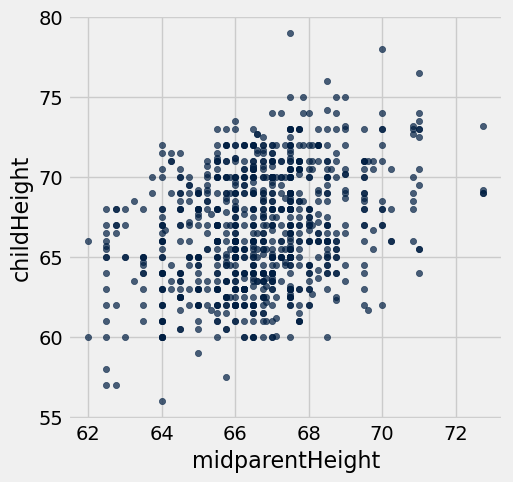

In [10]:
galton.scatter('midparentHeight', 'childHeight')

Suppose that a child's parents have an average height of 68 inches. How might we predict that child's height? A reasonable approach would be to identify other children whose parents' average height is close to 68 inches, and use the average heights of these children.

Let's identify the rows of the table where heights are within 0.5 inches of 68:

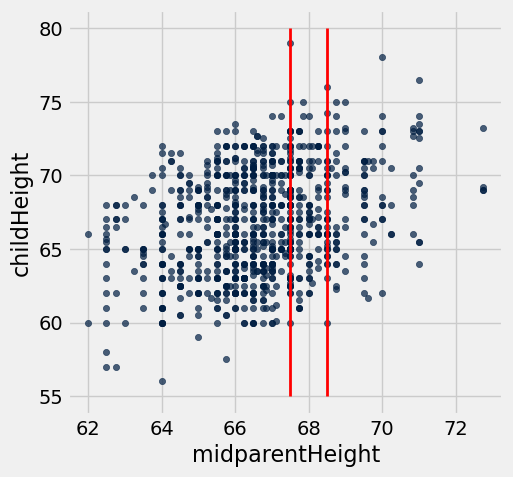

In [11]:
galton.scatter('midparentHeight', 'childHeight')

# Add vertical red lines to the scatter plot, to indicate the range [67.5, 68.5]
plots.plot([67.5, 67.5], [55, 80], color='red', lw=2)
plots.plot([68.5, 68.5], [55, 80], color='red', lw=2);

In [12]:
# Use the where method to identify rows where parents' average height is within 0.5 inches of 68
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby

family,father,mother,children,childNum,gender,childHeight,midparentHeight
11,74,62,8,1,male,74,68
11,74,62,8,2,male,70,68
11,74,62,8,3,female,68,68
11,74,62,8,4,female,67,68
11,74,62,8,5,female,67,68
11,74,62,8,6,female,66,68
11,74,62,8,7,female,63.5,68
11,74,62,8,8,female,63,68
12,74,61,1,1,female,65,67.5
19,73.2,63,1,1,female,62.7,68.1


In [13]:
# Calculate the average height of children in these rows
nearby_mean = np.average(nearby.column('childHeight'))
nearby_mean

67.620000000000005

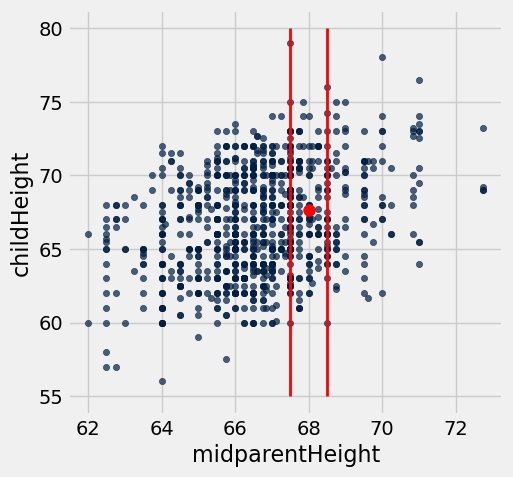

In [14]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [55, 80], color='red', lw=2)
plots.plot([68.5, 68.5], [55, 80], color='red', lw=2)

# Mark the predicted height for children whose parents' average height is 68 inches
plots.scatter(68, nearby_mean, color='red', s=70);

Now we have a sequence of steps for predicting a child's height: identify rows in the table where `midparentHeight` is within 0.5 inches of their parents' average height, then calculate the average of `childHeight` for those rows. 

It would be a good idea to write a function to perform these steps, so that we can reuse it again and again:

In [15]:
def predict(h):
    """
    Predict the height of a child based on the average height h of their parents.
    """
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('childHeight'))

In [16]:
predict(68)

67.620000000000005

In [17]:
predict(70)

68.561904761904756

In [18]:
predict(73)

70.099999999999994

In [19]:
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight
1,78.5,67,4,1,male,73.2,72.75
1,78.5,67,4,2,female,69.2,72.75
1,78.5,67,4,3,female,69,72.75
1,78.5,67,4,4,female,69,72.75
2,75.5,66.5,4,1,male,73.5,71
2,75.5,66.5,4,2,male,72.5,71
2,75.5,66.5,4,3,female,65.5,71
2,75.5,66.5,4,4,female,65.5,71
3,75,64,2,1,male,71,69.5
3,75,64,2,2,female,68,69.5


**Question:** use the `apply` method to predict the height of every child (row) in the table `galton`. Add this array of predictions back into the table as a new column `predictedHeight`.

In [21]:
predicted_height = galton.apply(predict, 'midparentHeight')
galton = galton.with_column('predictedHeight', predicted_height)

In [22]:
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight,predictedHeight
1,78.5,67,4,1,male,73.2,72.75,70.1
1,78.5,67,4,2,female,69.2,72.75,70.1
1,78.5,67,4,3,female,69,72.75,70.1
1,78.5,67,4,4,female,69,72.75,70.1
2,75.5,66.5,4,1,male,73.5,71,70.4158
2,75.5,66.5,4,2,male,72.5,71,70.4158
2,75.5,66.5,4,3,female,65.5,71,70.4158
2,75.5,66.5,4,4,female,65.5,71,70.4158
3,75,64,2,1,male,71,69.5,68.5025
3,75,64,2,2,female,68,69.5,68.5025


Let's see how our predictions look on the scatter plot. Instead of providing a single column name as the second argument to `scatter`, we can provide a list of column names, and `scatter` will plot both of those columns:

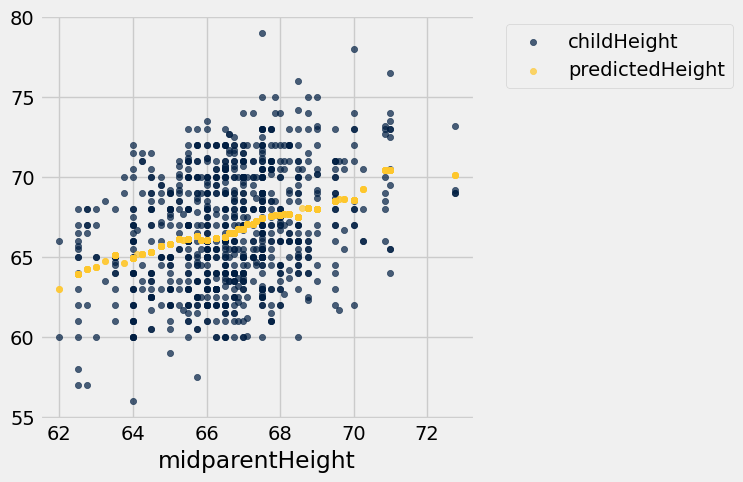

In [23]:
galton.scatter('midparentHeight', ['childHeight', 'predictedHeight'])

How accurate is our approach to predicting heights?

**Question:** write a function called `difference` that takes two arguments, and returns the difference between them.

In [24]:
def difference(predicted, true):
    return predicted - true

In [26]:
difference(74, 80)

-6

**Question:** use the `apply` method to create an array of prediction errors for each row. Add this array to the `galton` table as a new column `errors`.

In [28]:
error_array = galton.apply(difference, 'predictedHeight', 'childHeight')
galton = galton.with_column('errors', error_array)
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight,predictedHeight,errors
1,78.5,67,4,1,male,73.2,72.75,70.1,-3.1
1,78.5,67,4,2,female,69.2,72.75,70.1,0.9
1,78.5,67,4,3,female,69,72.75,70.1,1.1
1,78.5,67,4,4,female,69,72.75,70.1,1.1
2,75.5,66.5,4,1,male,73.5,71,70.4158,-3.08421
2,75.5,66.5,4,2,male,72.5,71,70.4158,-2.08421
2,75.5,66.5,4,3,female,65.5,71,70.4158,4.91579
2,75.5,66.5,4,4,female,65.5,71,70.4158,4.91579
3,75,64,2,1,male,71,69.5,68.5025,-2.4975
3,75,64,2,2,female,68,69.5,68.5025,0.5025


Let's look at the distribution of errors with a simple histogram:

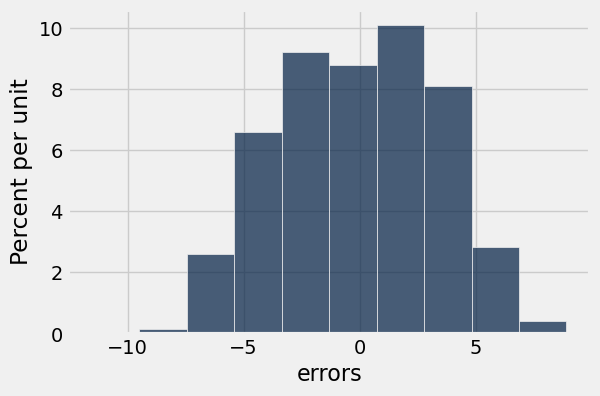

In [29]:
galton.hist('errors')

If we'd like, we can plot separate histograms for different groups of rows, based on the value of a particular variable. For example, we can create a separate histogram for the error of boys and girls, by adding the argument `group = 'gender'` to group rows by the `gender` column.

In [30]:
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight,predictedHeight,errors
1,78.5,67,4,1,male,73.2,72.75,70.1,-3.1
1,78.5,67,4,2,female,69.2,72.75,70.1,0.9
1,78.5,67,4,3,female,69,72.75,70.1,1.1
1,78.5,67,4,4,female,69,72.75,70.1,1.1
2,75.5,66.5,4,1,male,73.5,71,70.4158,-3.08421
2,75.5,66.5,4,2,male,72.5,71,70.4158,-2.08421
2,75.5,66.5,4,3,female,65.5,71,70.4158,4.91579
2,75.5,66.5,4,4,female,65.5,71,70.4158,4.91579
3,75,64,2,1,male,71,69.5,68.5025,-2.4975
3,75,64,2,2,female,68,69.5,68.5025,0.5025


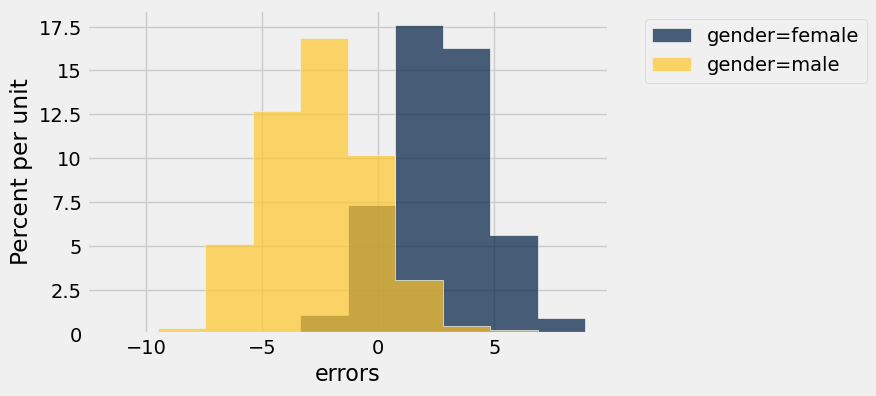

In [31]:
galton.hist('errors', group='gender')

What do you notice about these two histograms?

In [ ]:
# The blue histogram is centered on positive error, so we are over-estimating the heights of female children.
# At the same time, the yellow histogram is centered on a negative error, so we are under-estimating the heights of 
# male children. It looks like gender is another important variable for explaining the heights of children in this data.

## Discussion Activity

**Question 1:** how can we also account for gender when making predictions about a child's height? Don't write any code yet; just explain what you would do to modify our prediction approach in a way that incorporates gender as well.

In [ ]:
# Find the average error for male and female children, and add that when predicting

In [32]:
np.average(galton.where('gender', 'female').column('errors'))

2.6062429104050859

In [33]:
np.average(galton.where('gender', 'male').column('errors'))

-2.5882835266302431

**Question 2:** Create a new function `predict_smarter`, which takes two arguments: `h` for height, and `g` for gender. Define this function so that it returns a prediction for height using both `h` and `g`.

In [34]:
def predict_smarter(h, g):
    
    # Filter down to rows where midparentHeight is within 0.5 inches of h
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    
    # Further filter down rows to where gender is identical to g
    nearby = nearby.where('gender', g)
    
    return np.average(nearby.column('childHeight'))

In [35]:
predict_smarter(68, 'female')

64.983516483516482

In [36]:
predict_smarter(68, 'male')

70.172340425531914

In [37]:
# Apply the predict_smarter function to get a new prediction for all children in the table
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')

# Add these predictions as a new column
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight,predictedHeight,errors,smartPredictedHeight
1,78.5,67,4,1,male,73.2,72.75,70.1,-3.1,73.2
1,78.5,67,4,2,female,69.2,72.75,70.1,0.9,69.0667
1,78.5,67,4,3,female,69,72.75,70.1,1.1,69.0667
1,78.5,67,4,4,female,69,72.75,70.1,1.1,69.0667
2,75.5,66.5,4,1,male,73.5,71,70.4158,-3.08421,73.4889
2,75.5,66.5,4,2,male,72.5,71,70.4158,-2.08421,73.4889
2,75.5,66.5,4,3,female,65.5,71,70.4158,4.91579,67.65
2,75.5,66.5,4,4,female,65.5,71,70.4158,4.91579,67.65
3,75,64,2,1,male,71,69.5,68.5025,-2.4975,70.7955
3,75,64,2,2,female,68,69.5,68.5025,0.5025,65.7


In [38]:
# Apply the difference function once again to calculate errors for smartPredictedHeight
smarter_pred_errs = galton.apply(difference, 'smartPredictedHeight', 'childHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)
galton

family,father,mother,children,childNum,gender,childHeight,midparentHeight,predictedHeight,errors,smartPredictedHeight,smartErrors
1,78.5,67,4,1,male,73.2,72.75,70.1,-3.1,73.2,0
1,78.5,67,4,2,female,69.2,72.75,70.1,0.9,69.0667,-0.133333
1,78.5,67,4,3,female,69,72.75,70.1,1.1,69.0667,0.0666667
1,78.5,67,4,4,female,69,72.75,70.1,1.1,69.0667,0.0666667
2,75.5,66.5,4,1,male,73.5,71,70.4158,-3.08421,73.4889,-0.0111111
2,75.5,66.5,4,2,male,72.5,71,70.4158,-2.08421,73.4889,0.988889
2,75.5,66.5,4,3,female,65.5,71,70.4158,4.91579,67.65,2.15
2,75.5,66.5,4,4,female,65.5,71,70.4158,4.91579,67.65,2.15
3,75,64,2,1,male,71,69.5,68.5025,-2.4975,70.7955,-0.204545
3,75,64,2,2,female,68,69.5,68.5025,0.5025,65.7,-2.3


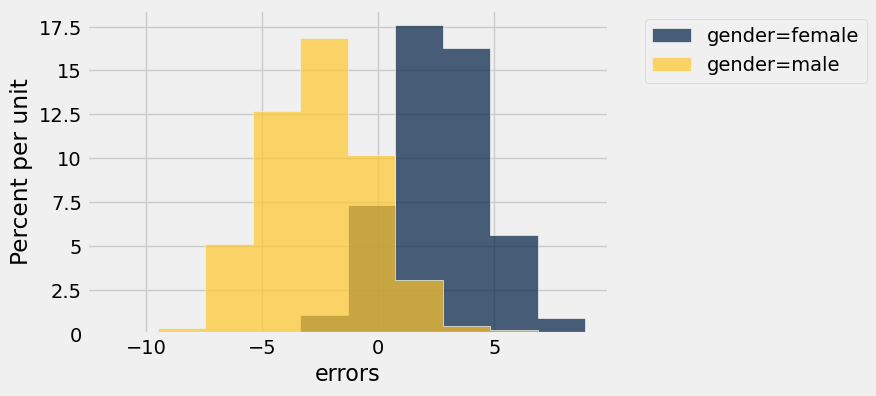

In [40]:
galton.hist('errors', group='gender')

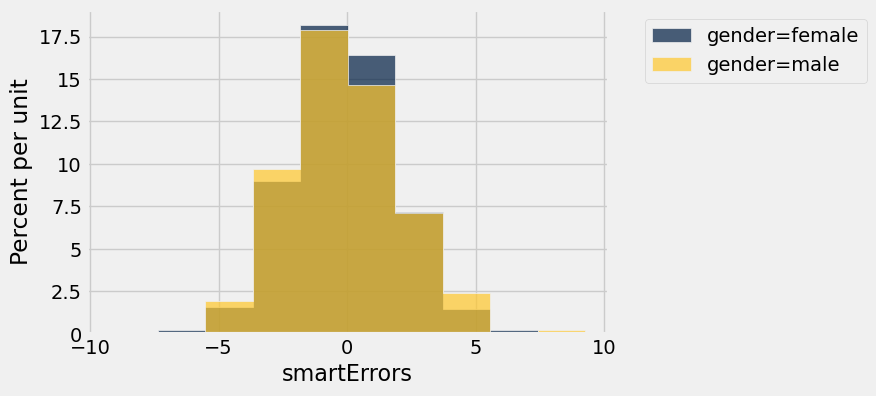

In [39]:
# Plot the distributions of errors for male and female children
galton.hist('smartErrors', group='gender')

## Grouping by One Column

Data scientists often need to classify individuals into groups according to shared features, and then identify some characteristics of the groups. This is easy in Python using the table method `group`.

We've seen the `group` method before in this class, when creating bar charts to visualize distributions of categorical variables:

In [41]:
# Load the table of highest-grossing movies
top_movies = Table.read_table('data/top_movies_2017.csv')

# Add a column of ages to the table
ages = 2023 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


In [42]:
# Use the group method to count how many rows in the table have each value of Studio
studio_distribution = top_movies.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


When we call `group` with one argument (the name of a column in the table, e.g., "Studio"), `group` will count how many rows have this value. What if we don't want to count the values? We can supply a function as a second argument to `group`:

In [43]:
# Use group to calculate the average of the other columns for each studio
top_movies.group('Studio', np.average)

Studio,Title average,Gross average,Gross (Adjusted) average,Year average,Age average
AVCO,,1.04945e+08,7.60778e+08,1967,56
Buena Vista,,3.53439e+08,4.56746e+08,2005.83,17.1714
Columbia,,9.56028e+07,4.58468e+08,1970,53
Disney,,1.00063e+08,6.46036e+08,1953.36,69.6364
Dreamworks,,3.08477e+08,4.86249e+08,2001,22
Fox,,2.32055e+08,6.2268e+08,1983.62,39.375
IFC,,2.41438e+08,3.68219e+08,2002,21
Lionsgate,,3.89938e+08,4.22882e+08,2013,10
MGM,,1.00595e+08,7.88231e+08,1963.29,59.7143
Metro,,9.18367e+06,4.08214e+08,1921,102


In [44]:
# Use group to calculate the min values of the other columns for each studio
top_movies.group('Studio', min)

Studio,Title min,Gross min,Gross (Adjusted) min,Year min,Age min
AVCO,The Graduate,104945305,760778000,1967,56
Buena Vista,Aladdin,156452370,338409100,1987,6
Columbia,Close Encounters of the Third Kind,21750000,355950700,1954,39
Disney,101 Dalmatians,40356000,405593100,1937,56
Dreamworks,Saving Private Ryan,216540909,406691500,1998,19
Fox,9 to 5,36000000,341357800,1953,7
IFC,My Big Fat Greek Wedding,241438208,368219200,2002,21
Lionsgate,The Hunger Games,337135885,362062100,2012,9
MGM,2001: A Space Odyssey,43656822,384863200,1939,35
Metro,The Four Horsemen of the Apocalypse,9183673,408214300,1921,102


In [45]:
top_movies.group('Age', max)

Age,Title max,Studio max,Gross max,Gross (Adjusted) max,Year max
6,Wonder Woman,Warner Brothers,504014165,504014165,2017
7,Zootopia,Warner Brothers,532177324,537326000,2016
8,Star Wars: The Force Awakens,Universal,936662225,961143200,2015
9,The Hunger Games: Mockingjay - Part 1,Warner Brothers,350126372,382981200,2014
10,The Hunger Games: Catching Fire,Universal,424668047,454409200,2013
11,The Hunger Games,Warner Brothers,623357910,683474000,2012
12,Transformers: Dark of the Moon,Warner Brothers,381011219,426630300,2011
13,Toy Story 3,Paramount,415004880,464074600,2010
14,Up,Warner Brothers,760507625,865082100,2009
15,The Dark Knight,Warner Brothers,534858444,661980500,2008


In [46]:
top_movies.group('Age', list)

Age,Title list,Studio list,Gross list,Gross (Adjusted) list,Year list
6,"['Beauty and the Beast (2017)', 'Wonder Woman', 'Guardia ...","['Buena Vista', 'Warner Brothers', 'Buena Vista']","[504014165, 406381596, 389397196]","[504014165, 406381596, 389397196]","[2017, 2017, 2017]"
7,"['Rogue One: A Star Wars Story', 'Finding Dory', 'Captai ...","['Buena Vista', 'Buena Vista', 'Buena Vista', 'Universal ...","[532177324, 486295561, 408084349, 368384330, 363070709, ...","[537326000, 499245400, 415654000, 384704200, 375984600, ...","[2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016]"
8,"['Star Wars: The Force Awakens', 'Jurassic World', 'Aven ...","['Buena Vista', 'Universal', 'Buena Vista', 'Buena Vista ...","[936662225, 652270625, 459005868, 356461711, 353007020, ...","[961143200, 702747400, 475854300, 383928800, 364701500, ...","[2015, 2015, 2015, 2015, 2015, 2015]"
9,"['American Sniper', 'GUnited Artistsrdians of the Galaxy ...","['Warner Brothers', 'Buena Vista', 'Lionsgate']","[350126372, 333176600, 337135885]","[382981200, 366068600, 362062100]","[2014, 2014, 2014]"
10,"['The Hunger Games: Catching Fire', 'Frozen', 'Iron Man ...","['Lionsgate', 'Buena Vista', 'Buena Vista', 'Universal']","[424668047, 400738009, 409013994, 368061265]","[454409200, 435974700, 433906300, 416888500]","[2013, 2013, 2013, 2013]"
11,"[""Marvel's The Avengers"", 'The Dark Knight Rises', 'The ...","['Buena Vista', 'Warner Brothers', 'Lionsgate']","[623357910, 448139099, 408010692]","[683474000, 511902300, 452174400]","[2012, 2012, 2012]"
12,"['Harry Potter and the Deathly Hallows Part 2', 'Transfo ...","['Warner Brothers', 'Paramount/Dreamworks']","[381011219, 352390543]","[426630300, 393479300]","[2011, 2011]"
13,"['Toy Story 3', 'Alice in Wonderland (2010)', 'Iron Man 2']","['Buena Vista', 'Buena Vista', 'Paramount']","[415004880, 334191110, 312433331]","[464074600, 373705500, 349375100]","[2010, 2010, 2010]"
14,"['Avatar', 'Transformers: Revenge of the Fallen', 'Harry ...","['Fox', 'Paramount/Dreamworks', 'Warner Brothers', 'Buen ...","[760507625, 402111870, 301959197, 293004164, 296623634]","[865082100, 479179200, 359788300, 349143900, 345910600]","[2009, 2009, 2009, 2009, 2009]"
15,"['The Dark Knight', 'Iron Man', 'Indiana Jones and the K ...","['Warner Brothers', 'Paramount', 'Paramount']","[534858444, 318412101, 317101119]","[661980500, 394234700, 392622400]","[2008, 2008, 2008]"


## Data Cleaning: Class Data Survey

Thanks to everyone who filled out the class data survey! Let's take a look at the data.

In [47]:
# Load the class data survey
survey = Table.read_table('data/cmpsc5a-classdata-w23.csv')
survey

Area Code,Major,Height,Eating Out,Handedness,Siblings,Birth Order,Exercise,Pets,Hours of Media,Random,Award,Tattoo,Sleep,Color,Coffee or Bagel,Tie Dyed,Commute Time,Commute Mode,WPM,Insta Follows,Social Media Accounts,Platform,Hours of Chores,Cursive
661,Physics,66,0,Right-handed,0,1,10,1,20,2790,Nobel Prize,No,5,blue,Bagel,No,15,bus,80,125,7,twitter,3,No
760,Economics,71,1,Right-handed,3,4,5,1,4,8472,Olympic Medal,No,8,blue,Bagel,No,10,bike,60,1323,3,Twitter,1,Yes
951,pre psychological and brain sciences,69,1,Right-handed,3,2,12,5,5,1953,Academy Award,No,7,sky blue,Bagel,No,30,bus,28,nan,1,Twitter,3,Yes
805,economics,65,6,Right-handed,0,1,2,1,10,1115,Nobel Prize,No,8,light pink,Coffee,No,30,bus,70,26,10,wechat,2,No
805,Communications,66,5,Right-handed,0,1,2,2,4,1234,Academy Award,No,10,Pink,Bagel,No,15,bike,50,400,7,WeChat,3,No
202,linguistics; environmental studies,67,1,Both left- and right-handed,1,1,2,0,2,5037,Nobel Prize,No,8,blue,Bagel,No,15,bus,65,124,5,nan,nan,No
818,sociology,62,3,Right-handed,0,1,11,0,3,3804,Olympic Medal,No,10,purple,Bagel,Yes,15,bike,100,595,8,twitter,3,Yes
408,English,64,1,Right-handed,2,3,7,1,4,5647,Nobel Prize,No,7,Green,Coffee,Yes,10,bike,nan,nan,5,nan,nan,Yes
408,Psychology,70,4,Right-handed,1,1,5,1,20,4821,Nobel Prize,No,8,Black,Bagel,No,14,bus,135,650,4,TikTok,0,Yes
805,communication,63,5,Right-handed,1,2,2,0,5,3419,Nobel Prize,No,7,purple,Coffee,No,15,bus,100,200,5,ins,1,Yes


In [48]:
# Use the group function to count how many respondents are in each major
survey.group('Major').show()

Major,count
Astrophysics,1
Bio-psychology,1
Biology,2
Chem,1
Chemistry,1
Communication,1
Communications,1
Econ,3
Econ,1
Econ and Accounting,1


**Question:** do you see any problems with these values?

In [49]:
# Get an array of the "unique" values of Major
# Why do some majors appear multiple times?
survey.group('Major').column('Major')

array(['Astrophysics', 'Bio-psychology ', 'Biology', 'Chem', 'Chemistry',
       'Communication ', 'Communications', 'Econ', 'Econ ',
       'Econ and Accounting', 'Econ/Biochem', 'Economics',
       'Economics / Psychology', 'Economics and Accounting', 'English',
       'Environmental Studies', 'Global Studies', 'Global studies', 'Math',
       'PBS', 'Physics', 'Pre-Bio', 'Pre-biology',
       'Pre-psych and Brain Sciences', 'Pre-sociology ',
       'Psych and Brain Sciences', 'Psychological and Brain Sciences',
       'Psychology', 'Sociology', 'Sociology ', 'Undeclared', 'biopsych',
       'communication', 'data science and stats', 'economics',
       'linguistics; environmental studies', 'microbiology', 'physics',
       'pre psychological and brain sciences', 'pre-psychology',
       'pre-sociology', 'sociology', 'sociology ', 'statistics',
       'undeclared '],
      dtype='<U36')

In [50]:
len(survey.group('Major').column('Major'))

45

*Data cleaning* is an important part of data science. Raw datasets will often have inconsistent values, or even missing values, which we will have to deal with before doing any analysis.

In [61]:
x = 4
2 * x

8

In [59]:
np.sin(np.pi / 2)

1.0

In [58]:
clean_major('Econ ')

'econ'

In [ ]:
major = 'Econ '
major = major.lower()

In [52]:
def clean_major(major):
    """
    Given a raw value of the Major variable, return a new string with the following changes:
      - all characters are lower case
      - all spaces and hyphens are removed
      - common words are replaced with their acronyms
    """
    
    # force all characters to be lower-case
    major = major.lower()                 
    
    # remove spaces and hyphens
    major = major.replace(' ', '')
    major = major.replace('-', '')
    
    # replace words with common acronyms
    major = major.replace('biology', 'bio')
    major = major.replace('economics', 'econ')
    major = major.replace('psychology', 'psych')
    major = major.replace('psychological', 'psych')
    major = major.replace('chemistry', 'chem')
    
    # some miscellaneous changes
    major = major.replace('communication', 'communications')
    
    return major    

In [53]:
# Add a column "clean_major", where we have applied the clean_major function
survey = survey.with_column(
    'cleaned_major',
    survey.apply(clean_major, 'Major'))

In [54]:
survey

Area Code,Major,Height,Eating Out,Handedness,Siblings,Birth Order,Exercise,Pets,Hours of Media,Random,Award,Tattoo,Sleep,Color,Coffee or Bagel,Tie Dyed,Commute Time,Commute Mode,WPM,Insta Follows,Social Media Accounts,Platform,Hours of Chores,Cursive,cleaned_major
661,Physics,66,0,Right-handed,0,1,10,1,20,2790,Nobel Prize,No,5,blue,Bagel,No,15,bus,80,125,7,twitter,3,No,physics
760,Economics,71,1,Right-handed,3,4,5,1,4,8472,Olympic Medal,No,8,blue,Bagel,No,10,bike,60,1323,3,Twitter,1,Yes,econ
951,pre psychological and brain sciences,69,1,Right-handed,3,2,12,5,5,1953,Academy Award,No,7,sky blue,Bagel,No,30,bus,28,nan,1,Twitter,3,Yes,prepsychandbrainsciences
805,economics,65,6,Right-handed,0,1,2,1,10,1115,Nobel Prize,No,8,light pink,Coffee,No,30,bus,70,26,10,wechat,2,No,econ
805,Communications,66,5,Right-handed,0,1,2,2,4,1234,Academy Award,No,10,Pink,Bagel,No,15,bike,50,400,7,WeChat,3,No,communicationss
202,linguistics; environmental studies,67,1,Both left- and right-handed,1,1,2,0,2,5037,Nobel Prize,No,8,blue,Bagel,No,15,bus,65,124,5,nan,nan,No,linguistics;environmentalstudies
818,sociology,62,3,Right-handed,0,1,11,0,3,3804,Olympic Medal,No,10,purple,Bagel,Yes,15,bike,100,595,8,twitter,3,Yes,sociology
408,English,64,1,Right-handed,2,3,7,1,4,5647,Nobel Prize,No,7,Green,Coffee,Yes,10,bike,nan,nan,5,nan,nan,Yes,english
408,Psychology,70,4,Right-handed,1,1,5,1,20,4821,Nobel Prize,No,8,Black,Bagel,No,14,bus,135,650,4,TikTok,0,Yes,psych
805,communication,63,5,Right-handed,1,2,2,0,5,3419,Nobel Prize,No,7,purple,Coffee,No,15,bus,100,200,5,ins,1,Yes,communications


In [55]:
survey.group('cleaned_major').show()

cleaned_major,count
astrophysics,1
bio,2
biopsych,2
chem,2
communications,2
communicationss,1
datascienceandstats,1
econ,17
econ/biochem,1
econ/psych,1


In [56]:
len(survey.group('cleaned_major').column('cleaned_major'))

28

This looks much better! We've gone from 45 unique values of the Major variable down to 28.

In [57]:
# Look at average values for each column by major
survey.group('cleaned_major', np.average)

cleaned_major,Area Code average,Major average,Height average,Eating Out average,Handedness average,Siblings average,Birth Order average,Exercise average,Pets average,Hours of Media average,Random average,Award average,Tattoo average,Sleep average,Color average,Coffee or Bagel average,Tie Dyed average,Commute Time average,Commute Mode average,WPM average,Insta Follows average,Social Media Accounts average,Platform average,Hours of Chores average,Cursive average
astrophysics,916,,65,5,,7,1,1,0,24,3696,,,6,,,,15,,60,478,9,,1,
bio,630.5,,65.95,2,,1.5,1,5,1.5,7,1617,,,8,,,,8.5,,48,167,4.5,,2.5,
biopsych,493,,63.75,2,,4.5,4.5,nan,0.5,nan,5719.5,,,7,,,,11,,nan,nan,nan,,nan,
chem,727.5,,64,2,,4,2.5,3,0.5,nan,nan,,,nan,,,,nan,,nan,nan,nan,,nan,
communications,860.5,,65.5,4,,0.5,1.5,3,0.5,6.5,2593,,,7.5,,,,12.5,,70,100.5,4.5,,1.5,
communicationss,805,,66,5,,0,1,2,2,4,1234,,,10,,,,15,,50,400,7,,3,
datascienceandstats,310,,61,0,,2,1,nan,0,nan,2417,,,nan,,,,nan,,nan,nan,nan,,nan,
econ,719,,68.9412,3.29412,,1.58824,2.11765,5.44118,1.52941,14,5609.06,,,7.91176,,,,13.6471,,84.8824,641.529,3.47059,,3.58824,
econ/biochem,408,,67,2,,1,1,5,1,8,3415,,,7,,,,15,,74,100,5,,2,
econ/psych,203,,72.5,4,,1,2,6,1,10,4444,,,8,,,,15,,65,1400,5,,7,


**Question:** the value `nan` indicates that the average could not be computed. Why is this happening?

In [ ]:
# ...